# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use("seaborn-v0_8")

# Load Data

In [2]:
data_path = "../data/raw/BrentOilPrices.csv"

df = pd.read_csv(data_path)
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


# Data Inspection & Cleaning

## Structure and Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


## Date Conversion

In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="mixed")
df = df.sort_values("Date").reset_index(drop=True)

df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


## Missing Values Check

In [6]:
df.isna().sum()

Date     0
Price    0
dtype: int64

# Brent Oil Prices Over Time

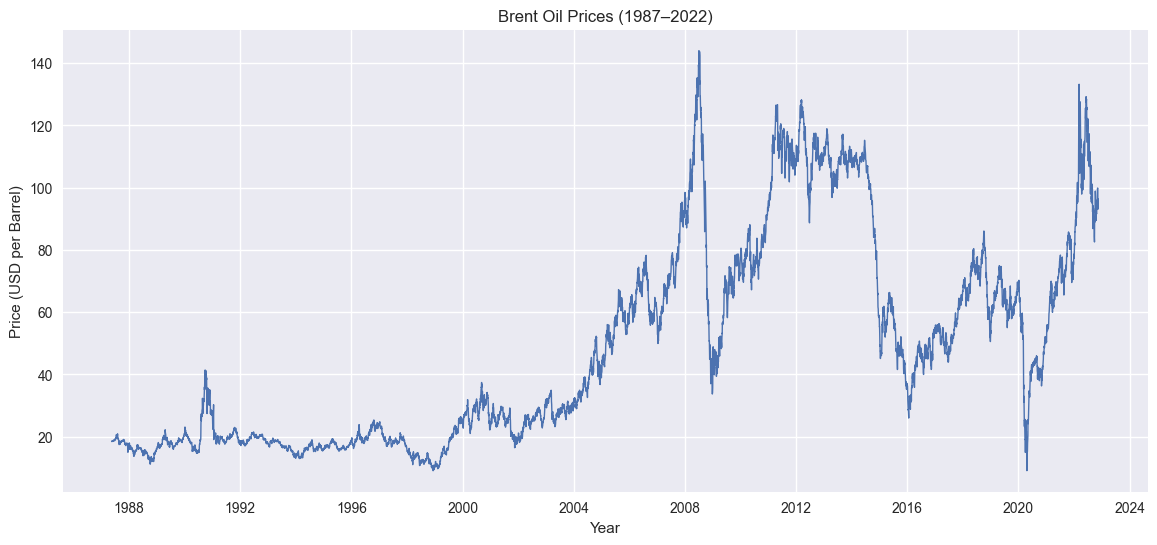

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Price"], linewidth=1)
plt.title("Brent Oil Prices (1987–2022)")
plt.xlabel("Year")
plt.ylabel("Price (USD per Barrel)")
plt.show()

The Brent oil price series exhibits strong non-stationarity with long-term trends and abrupt shocks. Major disruptions and regime changes are visually apparent, motivating formal change point analysis.

# Augmented Dickey-Fuller Test on Prices

In [8]:
adf_result = adfuller(df["Price"])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


The ADF test fails to reject the null hypothesis of a unit root, confirming that raw Brent oil prices are non-stationary.

# Log-Return Transformation

## Compute Log Returns

In [9]:
df["log_price"] = np.log(df["Price"])
df["log_return"] = df["log_price"].diff()

returns = df.dropna().copy()
returns.head()

,Date,Price,log_price,log_return
1,1987-05-21,18.45,2.915064,-0.009709
2,1987-05-22,18.55,2.920470,0.005405
3,1987-05-25,18.60,2.923162,0.002692
4,1987-05-26,18.63,2.924773,0.001612
5,1987-05-27,18.60,2.923162,-0.001612


## Save for later modeling

In [10]:
returns.to_csv("../data/processed/brent_log_returns.csv", index=False)

# Log Returns Plot

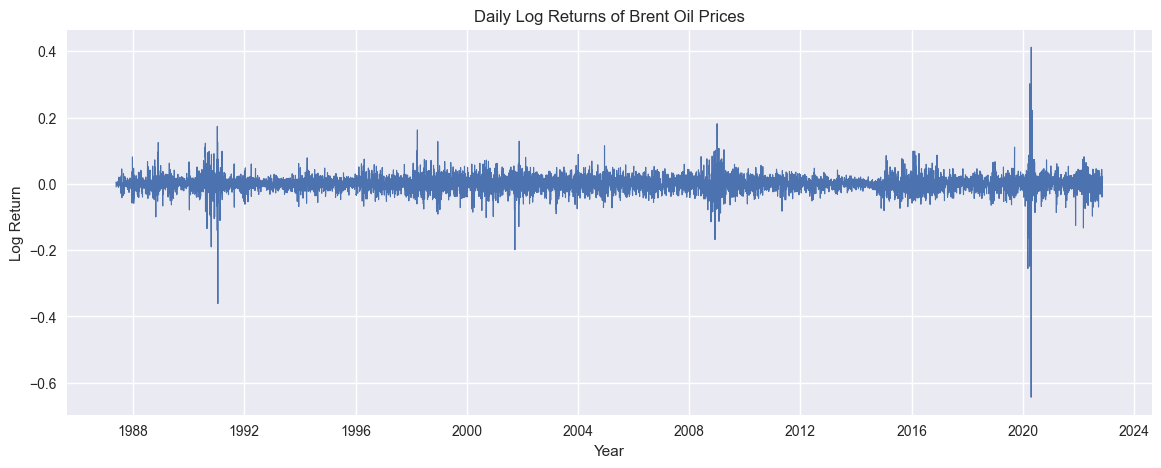

In [11]:
plt.figure(figsize=(14,5))
plt.plot(returns["Date"], returns["log_return"], linewidth=0.8)
plt.title("Daily Log Returns of Brent Oil Prices")
plt.xlabel("Year")
plt.ylabel("Log Return")
plt.show()

Log returns fluctuate around zero and display volatility clustering, a common feature of financial time series. This supports probabilistic and regime-based modeling approaches.

# ADF on Log Returns

In [12]:
adf_ret = adfuller(returns["log_return"])

print("ADF Statistic:", adf_ret[0])
print("p-value:", adf_ret[1])

ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29


# ACF Plot

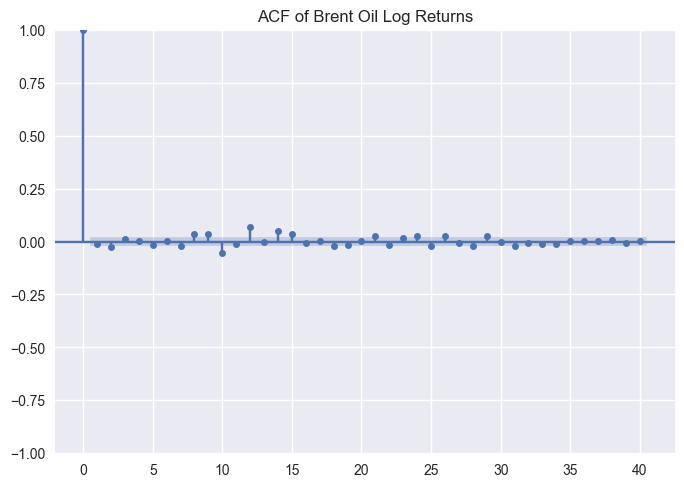

In [13]:
plot_acf(returns["log_return"], lags=40)
plt.title("ACF of Brent Oil Log Returns")
plt.show()

# Rolling Volatility

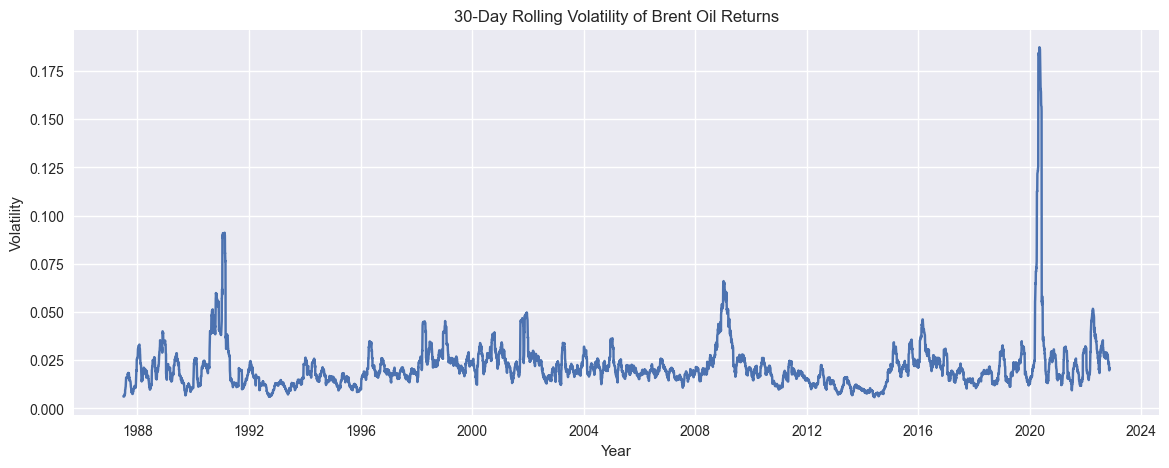

In [14]:
returns["rolling_vol"] = returns["log_return"].rolling(30).std()

plt.figure(figsize=(14,5))
plt.plot(returns["Date"], returns["rolling_vol"])
plt.title("30-Day Rolling Volatility of Brent Oil Returns")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.show()

# Summary

- Brent oil prices are non-stationary with visible regime shifts

- Log returns are stationary and suitable for Bayesian modeling

- Volatility clustering indicates structural changes over time

- These properties justify Bayesian Change Point Analysis to detect regime shifts associated with major global events